# Private Skin Cancer Detection

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import tf_encrypted as tfe 
from tf_encrypted.private_model import PrivateModel, load_graph, secure_model

from PIL import Image
from IPython.core.display import display

## 0. Input

In [3]:
def preprocess_image(file):
    
    #Load & resize
    im = Image.open("ISIC_0014772.jpg").resize((200,200))
    
    print("Melanoma Image")
    display(im)
    
    # To numpy
    im_np = np.array(im)
    
    # Normalize
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    im_norm = (im_np/255 - mean)/std
    
    im_norm = im_norm.reshape(1,200,200,3)

    return im_norm

Melanoma Image


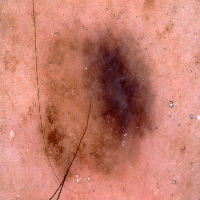

In [4]:
skin_cancer_input = preprocess_image("ISIC_0014772.jpg")

## 1. Load Pre-Trained Tensorflow Graph

In [5]:
graph_def, inputs = load_graph("/tmp/model.pb")

## 2. Secure the Model 

In [6]:
with tfe.protocol.SecureNN():
    c = tfe.convert.convert.Converter()
    y = c.convert(graph_def, tfe.convert.register(), 'input-provider', inputs)
    
model_private = PrivateModel(y)

## 3. Make Private Prediction

In [7]:
private_logit = model_private.private_predict(skin_cancer_input)

In [8]:
if np.argmax(private_logit) == 1:
    print("It's a Melanoma")
else:
    print("It's not a Melanoma")

It's a Melanomna
